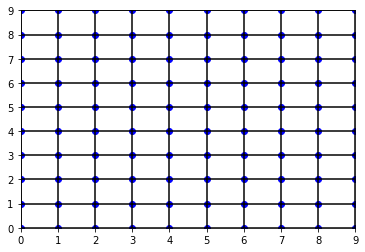

In [5]:
import matplotlib.pyplot as plt

# Define the number of points in each dimension
n = 10

# Generate the x and y coordinates of the points
x = [i for i in range(n) for _ in range(n)]
y = [j for _ in range(n) for j in range(n)]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the points
ax.plot(x, y, 'bo')

# Connect the points horizontally
for i in range(n):
    for j in range(n-1):
        ax.plot([x[i*n+j], x[i*n+j+1]], [y[i*n+j], y[i*n+j+1]], 'k-')

# Connect the points vertically
for i in range(n-1):
    for j in range(n):
        ax.plot([x[i*n+j], x[(i+1)*n+j]], [y[i*n+j], y[(i+1)*n+j]], 'k-')

# Set the axis limits
ax.set_xlim(0, n-1)
ax.set_ylim(0, n-1)

# Show the plot
plt.show()


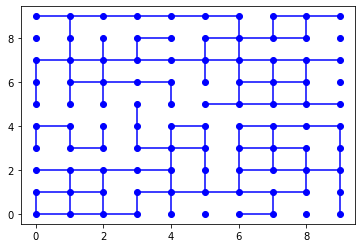

In [6]:
import random

# Define the probability of eliminating a connection
p = 0.5

# Create graph object
fig, ax = plt.subplots()
ax.plot(x,y, 'bo')

# Iterate through each connection horizontally
for i in range(n):
    for j in range(n-1):
        if random.random() < p:
            ax.plot([x[i*n+j], x[i*n+j+1]], [y[i*n+j], y[i*n+j+1]], 'b-')

# Iterate through each connection vertically
for i in range(n-1):
    for j in range(n):
        if random.random() < p:
            ax.plot([x[i*n+j], x[(i+1)*n+j]], [y[i*n+j], y[(i+1)*n+j]], 'b-')

# Show the updated plot
plt.show()


In [7]:

def count_largest_subsequent_connections(x, y, p, n=10):
    # Initialize variables
    max_connections_horizontal = 0
    max_connections_vertical = 0
    current_connections_horizontal = 0
    current_connections_vertical = 0

    # Iterate through each connection horizontally
    for i in range(n):
        for j in range(n-1):
            if random.random() < p:
                current_connections_horizontal += 1
            else:
                max_connections_horizontal = max(max_connections_horizontal, current_connections_horizontal)
                current_connections_horizontal = 0

    # Check if the last set of connections is the largest
    max_connections_horizontal = max(max_connections_horizontal, current_connections_horizontal)

    # Iterate through each connection vertically
    for i in range(n-1):
        for j in range(n):
            if random.random() < p:
                current_connections_vertical += 1
            else:
                max_connections_vertical = max(max_connections_vertical, current_connections_vertical)
                current_connections_vertical = 0

    # Check if the last set of connections is the largest
    max_connections_vertical = max(max_connections_vertical, current_connections_vertical)

    return max_connections_horizontal, max_connections_vertical


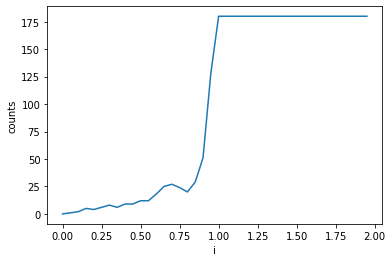

In [8]:
counts = []
num_probs = 40
probs = [(i*0.05) for i in range(num_probs)]

for i in probs:
    count = count_largest_subsequent_connections(x, y, i, n=10)
    counts.append(sum(count))

# Plot the counts against the i values
plt.plot(probs, counts)

# Set the x-axis label
plt.xlabel('i')

# Set the y-axis label
plt.ylabel('counts')

# Show the plot
plt.show()


In [9]:
def percolation_simulation(p, n=10):
    # Initialize the grid
    grid = [[random.random() < p for _ in range(n)] for _ in range(n)]

    # Perform depth-first search to find connected clusters
    def dfs(i, j):
        if 0 <= i < n and 0 <= j < n and grid[i][j]:
            grid[i][j] = False  # Mark the node as visited
            for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                dfs(i + di, j + dj)

    # Count connected clusters
    count_clusters = 0
    for i in range(n):
        for j in range(n):
            if grid[i][j]:
                count_clusters += 1
                dfs(i, j)

    return count_clusters

In [ ]:
# Simulation parameters
num_probs = 40
probs = [(i*0.05) for i in range(num_probs)]

# Run simulations for each probability
counts = [percolation_simulation(p, n=100) for p in probs]

# Plot the results

plt.plot(probs, counts)
plt.xlabel('p')
plt.ylabel('Connected Clusters')
plt.title('Percolation Simulation')
plt.show()

: 